# Overview

This week is all about working with data. I'm not going to lie to you. This part might be frustrating - but frustration is an integral part of learning. Real data is almost always messy & difficult ... and learning to deal with that fact, is a key part of being a data scientist. 


Enough about the process, let's get to the content. 

![Text](https://raw.githubusercontent.com/suneman/socialgraphs2025/main/files/rock.png "Great image choice, Sune")

Today, we will use network science and Wikipedia to learn about the relationships of **[Rock Bands & Performers](https://en.wikipedia.org/wiki/List_of_mainstream_rock_performers)**. 

To create the network, we will download the Wikipedia pages for all people in the list. Next, we create the network of the pages that link to each other. We can do this because wikipedia pages link to one another. So [The Beatles](https://en.wikipedia.org/wiki/The_Beatles) links to [the Kinks](https://en.wikipedia.org/wiki/The_Kinks), for example.

Next time, we'll use our network skills (as well as new ones) to understand that network. Further down the line, we'll use natural language processing to extract information from the text displayed on those pages.

But for today, the tasks are:

* Learn about regular expressions.
* Download and store (for later use) all the performer-pages from Wikipedia.
* Extract all the internal wikipedia-links that connect the performers on Wikipedia.
* Generate the network of performers on wikipedia.
* Calculate some simple network statistics.
* Create a simple plot

---

# Prelude: Regular expressions

Before we get started, we have to get a little head start on the _Natural Language Processing_ part of the class. This is a new direction for us. Up to now, we've mostly been doing math-y stuff with Python, but today, we're going to be using Python to work through a text. The central thing we need to be able to do today, is to extract internal wikipedia links (links between wiki-pages). And for that we need regular expressions.


> *Reading/Video*
> * Read [**this tutorial**](https://developers.google.com/edu/python/regular-expressions) to form an overview of regular expressions. This is important to understand the content of the tutorial (also very useful later), so you may actually want to work through the examples. 
> * (**Experiment**: An alternative to reading. If you love videos more than reading, you can also check out [this YouTube explainer video](https://www.youtube.com/watch?v=rhzKDrUiJVk) instead of going through the tutorial above -- it's a friendly looking young man called Kyle who goes through RegExps from his bedroom. I haven't watched the whole thing ... since I personally don't like video explainers ... but it has many views + thumbs up.)

> _Exercises_: Regular expressions round 1\.
> * Now, explain in your own words: what are regular expressions?
> * Provide an example of a regex to match 4 digits numbers (by this, I mean precisely 4 digits, you should not match any part of numbers with e.g. 5 digits). In your notebook, use `findall` to show that your regex works on this [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt). **Hint**: a great place to test out regular expressions is: https://regex101.com.
> * Provide an example of a regex to match words starting with "super". Show that it works on the [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt).
> 


 **Hint**: Try to solve this exercise on your own (that's what you will get the most out of - learning wise), but if you get stuck ... you will find the solution in one of the video lectures below.
> 

## 🔹 What are regular expressions?

Regular expressions (often shortened to **regex** or **regexp**) are patterns that describe sets of strings. They act like a search language inside text:

- You write a pattern (a kind of mini-language).  
- The regex engine scans through text and finds all matches of that pattern.  

This is useful for tasks like:  
- Finding words  
- Validating formats (emails, phone numbers)  
- Extracting pieces of text  

Think of them as super-powered **“find”** commands that allow you to match very specific things.

## 🔹 Example 1: Match 4-digit numbers

We want exactly 4 digits, not 3 or 5.  

**Regex pattern:**

```regex

\b\d{4}\b 

```
- `\d` → digit (0–9)  
- `{4}` → exactly 4 times  
- `\b` → word boundary (makes sure the number isn’t part of a longer one like `12345`)  


In [1]:
import re
import requests

# Load the test text
url = "https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt"
text = requests.get(url).text

# Regex for 4-digit numbers
pattern = r"\b\d{4}\b"
matches = re.findall(pattern, text)

print(matches[:20])  # show first 20 matches

['1234', '9999']


We want words that begin with `"super"` (like `superhero`, `superman`, `superlative`).  

**Regex pattern:**

```regex
\b(super\w*)\b
```
- super → literal match
- \w* → zero or more word characters after it (letters, digits, underscore)
- \b → word boundary

In [2]:
pattern = r"\bsuper\w*\b"
matches = re.findall(pattern, text)

print(matches[:20])  # first 20 "super..." words

['superpolaroid', 'supertaxidermy', 'superbeer']


## 🔹 Wiki-links in Wikipedia markup

Wiki-links in Wikipedia markup always look like:

- `[[PageName]]`  
- `[[PageName|Display Name]]`  

So we need a regex that:

- Finds double square brackets `[[ ... ]]`.  
- Extracts the text inside (everything up to the first `]]`).  
- Optionally handles the `|` (pipe), which separates the actual link target from the display text.  

---

## 🔹 Regex pattern

```regex
\[\[([^\]|]+)(?:\|([^\]]+))?\]\]
```

In [3]:
# Regex for wiki-links
pattern = r"\[\[([^\]|]+)(?:\|([^\]]+))?\]\]"
matches = re.findall(pattern, text)

# Let's print first 10 matches
for target, display in matches[:10]:
    print(f"Page: {target}, Display: {display if display else target}")

Page: drinking vinegar, Display: drinking vinegar
Page: gentrify, Display: gentrify
Page: hashtag, Display: hashtag
Page: Bicycle, Display: Bicycle(two-wheeled type)
Page: Pitchfork, Display: Pitchfork Magazine


---

# Part 1: Download the Wikipedia pages of characters

It's time to download all of the pages of the characters. Use your experience with APIs from Week 1\. To get started, I **strongly** recommend that you re-watch the **APIs video lecture** from that week - it contains lots of useful tips on this specific activity (yes, I had planned this all along!). I've included it below for your covenience.

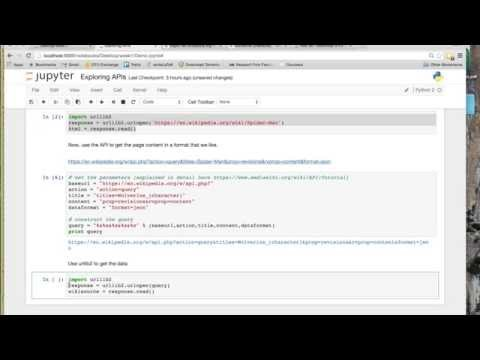

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("9l5zOfh0CRo",width=800, height=450)

Now, it's time to go and get the names of all the wiki pages you'll need for your analysis. Those will serve as the nodes in our network. 

*Exercise*
> * Go to the page https://en.wikipedia.org/wiki/List_of_mainstream_rock_performers and extract all of the artist-links using your regular expressions from above.
>   * Hint: To make this easier, you can simply hit the edit button on wikipedia, copy the entire content of the file to a plain text file on your computer and manually delete all of the markup that's not related to the artists' names. (Otherwise there are some wiki-links there that you don't want)

#### A note to the perfectionists out there
The files contain names and corresponding wiki-link, but pages can be missing or redirected. If you encounter re-directs, you can follow the redirect link and see if you can recover a page that's not already in your database.  (But you do not have to do that either - it's fine to just skip ... many new issues can arise if you try to follow the redirects).

#### Back to our regularly scheduled programming

With the list from the exercise above, you now have all of the nodes in the network.

*Exercise*

> * Use your knowledge of APIs and the list of all the wiki-pages to download all the text on the pages of the rock performers. 
>   - Hint 0: Make sure you read the [Wiki API pages](https://www.mediawiki.org/wiki/API:Main_page) to ensure that your **download the cleanest possible version of the page (the wikitext)**. [This link](https://stackoverflow.com/questions/55779015/get-wikitext-from-wikipedia-api) may be helpful.
>   - Hint 1: You may want to save the individual band/artist pages on your computer. You can use your skills from the first lectures to write them as plain-text files (that's what I would do - one file per band/artist, named according to its wiki-link). (But you can also use pickle files or start a database if you like that better.)
>   - Hint 2: If you now have a directory with all those files, you can use [`os.listdir()`](https://www.geeksforgeeks.org/python-os-listdir-method/) to list all the files in that directory within Python and iterate over the files if you need to.
>   - Hint 3: Don't forget to add underscores to the performer names when you construct the urls

In [5]:
import requests
import re
from time import sleep

S = requests.Session()
S.headers.update({'User-Agent': 'Mozilla/5.0 (compatible; socialgraphs2025/1.0; +https://github.com/suneman/socialgraphs2025)'})
API = "https://en.wikipedia.org/w/api.php"

def get_sections(page):
    r = S.get(API, params={
        "action": "parse",
        "page": page,
        "prop": "sections",
        "format": "json"
    })
    r.raise_for_status()
    data = r.json()
    return data["parse"]["sections"]

def get_section_wikitext(page, section_index):
    r = S.get(API, params={
        "action": "parse",
        "page": page,
        "prop": "wikitext",
        "section": section_index,
        "format": "json"
    })
    r.raise_for_status()
    return r.json()["parse"]["wikitext"]["*"]

WIKILINK_RE = re.compile(r"\[\[([^\]|#]+)(?:#[^\]|]*)?(?:\|[^\]]+)?\]\]")

def extract_artist_pages_from_wikitext(wikitext):
    pages = set()
    for line in wikitext.splitlines():
        if line.lstrip().startswith("*"):
            for m in WIKILINK_RE.finditer(line):
                target = m.group(1).strip()
                if ":" in target:
                    ns = target.split(":", 1)[0]
                    # exclude common non-article namespaces
                    if ns.lower() in ("file", "image", "category", "template", "help", "portal"):
                        continue
                pages.add(target.replace(" ", "_"))
    return pages

page = "List_of_mainstream_rock_performers"
sections = get_sections(page)

# alphabet sections are usually level-2 with numbers like 2,3,4...
alpha_sections = [s for s in sections if s.get("line", "").strip() and len(s["line"]) == 1 and s["line"].isalpha()]

artist_pages = set()
for sec in alpha_sections:
    wikitext = get_section_wikitext(page, sec["index"])
    artist_pages |= extract_artist_pages_from_wikitext(wikitext)
    sleep(0.1)  # be polite

print(f"Found {len(artist_pages)} artist pages (API).")
# preview a few
for i, p in enumerate(sorted(artist_pages)[:20], 1):
    print(i, p)


Found 484 artist pages (API).
1 ABBA
2 AC/DC
3 AFI_(band)
4 A_Perfect_Circle
5 Accept_(band)
6 Adam_Ant
7 Aerosmith
8 Air_Supply
9 Alanis_Morissette
10 Alice_Cooper
11 Alice_Cooper_(band)
12 Alice_in_Chains
13 AllMusic
14 Alter_Bridge
15 Ambrosia_(band)
16 America_(band)
17 Anthrax_(American_band)
18 April_Wine
19 Arcade_Fire
20 Arctic_Monkeys


In [12]:
import os, time, re, requests
from pathlib import Path

API = "https://en.wikipedia.org/w/api.php"

# ---- 0) Sanity: where are we writing? can we write here? ----
print("CWD:", os.getcwd())
Path("pages").mkdir(exist_ok=True)
(Path("pages") / "_write_test.txt").write_text("ok", encoding="utf-8")
print("Write test OK at:", (Path("pages") / "_write_test.txt").resolve())

# ---- 1) Supply your set of artist pages here ----
# If you already have it as a Python set named `artist_pages`, keep it.
try:
    artist_pages
except NameError:
    # Minimal seed if you don't:
    artist_pages = {"ABBA", "AC/DC", "Aerosmith", "Alice_in_Chains"}

print(f"Artist titles count: {len(artist_pages)}")
print("Sample titles:", list(sorted(artist_pages))[:8])

# ---- 2) Session with friendly User-Agent ----
S = requests.Session()
S.headers.update({
    "User-Agent": "MainstreamRockScraper/1.0 (coursework; contact: your_email@example.com)"
})

def _request_with_retries(params, max_retries=5, base_sleep=1.0):
    attempt = 0
    while True:
        try:
            r = S.get(API, params=params, timeout=30)
            # Retry on common throttle/overload statuses
            if r.status_code in (403, 429, 500, 502, 503, 504):
                raise requests.HTTPError(f"HTTP {r.status_code} {r.text[:200]}")
            r.raise_for_status()
            return r.json()
        except requests.HTTPError as e:
            attempt += 1
            if attempt > max_retries:
                print("FINAL HTTP error:", e)
                raise
            sleep_for = base_sleep * (2 ** (attempt - 1))
            print(f"HTTP error, retrying in {sleep_for:.1f}s ... ({attempt}/{max_retries})")
            time.sleep(sleep_for)

def fetch_wikitext_revisions(titles):
    """action=query&prop=revisions path (wikitext)"""
    params = {
        "action": "query",
        "format": "json",
        "formatversion": "2",
        "prop": "revisions",
        "rvprop": "content",
        "rvslots": "main",
        "redirects": "1",
        "maxlag": "5",
        "titles": "|".join(titles),
    }
    data = _request_with_retries(params)

    norm = {n["from"]: n["to"] for n in data.get("query", {}).get("normalized", [])}
    redir = {r["from"]: r["to"] for r in data.get("query", {}).get("redirects", [])}

    by_title = {}
    for p in data.get("query", {}).get("pages", []):
        title = p.get("title")
        if p.get("missing"):
            by_title[title] = None
        else:
            revs = p.get("revisions") or []
            content = (revs[0]["slots"]["main"].get("content") if revs else None)
            by_title[title] = content

    results = {}
    for t in titles:
        t2 = norm.get(t, t)
        t2 = redir.get(t2, t2)
        results[t] = by_title.get(t2, by_title.get(t))
    return results

def fetch_wikitext_parse(title):
    """Fallback: action=parse&prop=wikitext for a single title."""
    params = {
        "action": "parse",
        "format": "json",
        "page": title,
        "prop": "wikitext",
        "redirects": "1",
        "maxlag": "5",
    }
    data = _request_with_retries(params)
    return data.get("parse", {}).get("wikitext", {}).get("*")

def save(content, title, out_dir="pages"):
    safe = title.replace("/", "_").replace(" ", "_")
    path = Path(out_dir) / f"{safe}.txt"
    if content:
        path.write_text(content, encoding="utf-8")
        return path
    return None

# ---- 3) Single known-page test (must create a file) ----
print("\nSingle-page smoke test: 'Aerosmith'")
try:
    c = fetch_wikitext_revisions(["Aerosmith"])["Aerosmith"]
    if not c:
        print("Revisions path returned empty; trying parse fallback...")
        c = fetch_wikitext_parse("Aerosmith")
    p = save(c, "Aerosmith")
    print("Saved to:", p.resolve() if p else "FAILED")
except Exception as e:
    print("Single-page test FAILED:", e)

# ---- 4) Batch download with verbose logging ----
def chunked(seq, n):
    seq = list(seq)
    for i in range(0, len(seq), n):
        yield seq[i:i+n]

ok, missing = 0, 0
for batch in chunked(sorted(artist_pages), 15):
    print(f"\nFetching batch ({len(batch)}):", batch)
    try:
        result = fetch_wikitext_revisions(batch)
    except Exception as e:
        print("Batch failed, falling back item-by-item:", e)
        result = {}
        for t in batch:
            try:
                c = fetch_wikitext_revisions([t])[t]
            except Exception as e1:
                print(f"  {t}: revisions path failed ({e1}); trying parse ...")
                try:
                    c = fetch_wikitext_parse(t)
                except Exception as e2:
                    print(f"  {t}: parse also failed ({e2})")
                    c = None
            result[t] = c
            time.sleep(0.4)

    for t, c in result.items():
        if not c:
            # Last-chance fallback to parse if revisions returned None
            print(f"  {t}: empty from revisions; trying parse fallback.")
            try:
                c = fetch_wikitext_parse(t)
            except Exception as e:
                print(f"  {t}: parse failed: {e}")
                c = None
        path = save(c, t)
        if path:
            print("  saved:", path.name, f"({len(c)} bytes)")
            ok += 1
        else:
            print("  SKIPPED (no content):", t)
            missing += 1
    time.sleep(0.6)

print(f"\nDONE. Saved: {ok} | Missing/empty: {missing}")
print("Output dir:", Path("pages").resolve())


CWD: c:\Users\Leuro\Desktop\DTU\SOCIAL GRAPHS\socialgraphs2025\lectures
Write test OK at: C:\Users\Leuro\Desktop\DTU\SOCIAL GRAPHS\socialgraphs2025\lectures\pages\_write_test.txt
Artist titles count: 484
Sample titles: ['ABBA', 'AC/DC', 'AFI_(band)', 'A_Perfect_Circle', 'Accept_(band)', 'Adam_Ant', 'Aerosmith', 'Air_Supply']

Single-page smoke test: 'Aerosmith'
Saved to: C:\Users\Leuro\Desktop\DTU\SOCIAL GRAPHS\socialgraphs2025\lectures\pages\Aerosmith.txt

Fetching batch (15): ['ABBA', 'AC/DC', 'AFI_(band)', 'A_Perfect_Circle', 'Accept_(band)', 'Adam_Ant', 'Aerosmith', 'Air_Supply', 'Alanis_Morissette', 'Alice_Cooper', 'Alice_Cooper_(band)', 'Alice_in_Chains', 'AllMusic', 'Alter_Bridge', 'Ambrosia_(band)']
  saved: ABBA.txt (152243 bytes)
  saved: AC_DC.txt (183971 bytes)
  saved: AFI_(band).txt (61606 bytes)
  saved: A_Perfect_Circle.txt (89175 bytes)
  saved: Accept_(band).txt (47424 bytes)
  saved: Adam_Ant.txt (94230 bytes)
  saved: Aerosmith.txt (191979 bytes)
  saved: Air_Supply

---

# Part 2: Building the networks

Now, we're going to build a single NetworkX directed graph with all the rock performers. (We are analyzing a network of bands/artists/perfomers. I'll use all of those interchangably below). 

The nodes in the network will be all the performers, and we will place an edge between nodes $A$ and $B$ if the Wikipedia page of node $A$ links to the Wikipedia page of node $B$.

The overall plan of attack for this is the following: 
* Take the pages you have downloaded for each performer. 
* Each page corresponds to a performer (= a node in your network). 
* Find all the links in a performers page that link to another node of the network (= some other performer). 
* There are many ways to do this, but below, I've tried to break it down into natural steps. 


*Exercise*: Build the network of Rock Performers 

> Now we can build the network. Here are the instructions.
>
>
> * Use a regular expression to extract all outgoing links from each of the pages you downloaded above. 
>   - Start by making a single page work. Do some debugging to make sure it's actually working.
>   - Then slowly build the loops over performers/pages to take your little operation to industrial scale
>   - You don't have to be perfect. There will be tricky edge-cases, you don't have to solve all of those. The key is to get a pretty good network to work with, not to make everything perfect.
> * For each link you extract, check if the target is a person from your list of performers. If yes, keep it. If no, discard it.
> * Use a NetworkX [`DiGraph`](https://networkx.org/documentation/stable/reference/classes/digraph.html) to store the network.
> * Store the `length of the content` as an attribute of the node (i.e. count the number of *words* you have in each character's page). By storing this information as a nodal features, we keep all the relevant data in one place. The safe way to count words without counting symbols is to use `regex`, but simpler methods are OK.
> * When have you finished, you'll notice that some nodes do not have any out- and in- degrees. Unless you've made a mistake, those are truly isolated bands/singers. Double check for mistakes, then *discard* those disconnected nodes from the network.
> * Finally, extract the largest component - it will make our work with visualisations much easier (note: removing *isolated* nodes (with no links) does not guarantee that you are left with the largest component).
>     - *Note 1*: For directed graphs use `weakly connected component` to extract the largest component. You can also check the hints on how to extract the largest component of a graph from Week 1 notebook.
>     - *Note 2*: Further analysis is done with the largest component.

Take a moment to think about what you have just accomplished! Using simple tools, you've managed to build a complex network by crawling data from wikipedia. This means that you are a powerful hacker. Congratulations.


In [13]:
import re
from pathlib import Path
import networkx as nx

PAGES_DIR = Path("pages")
assert PAGES_DIR.exists(), f"Missing folder: {PAGES_DIR.resolve()}"

# --- 0) Who are our performers? ---
# Use your known list if it exists; else, infer from filenames in ./pages
try:
    artist_pages
    performers = {p.replace(" ", "_") for p in artist_pages}
except NameError:
    performers = {f.stem for f in PAGES_DIR.glob("*.txt")}  # from filenames

print(f"Performers detected: {len(performers)}")

# Normalize helper (keep it simple; Wikipedia is space/underscore tolerant)
def canon(title: str) -> str:
    return title.replace(" ", "_")

# --- 1) Regex to extract wiki-links from wikitext ---
# Captures [[Target]] and [[Target|Display]], strips section anchors like [[Target#Section|...]]
WIKILINK_RE = re.compile(r"\[\[([^\]|#]+)(?:#[^\]|]*)?(?:\|[^\]]+)?\]\]")

# --- 2) Word counting (letters/digits, handles accents roughly) ---
WORD_RE = re.compile(r"[A-Za-zÀ-ÖØ-öø-ÿ0-9']+")

def extract_links(wikitext: str):
    """Return canonical target titles from wikitext."""
    targets = []
    for m in WIKILINK_RE.finditer(wikitext):
        tgt = m.group(1).strip()
        # Skip common non-article namespaces like File:, Category:, Template:, Help:, Portal:
        if ":" in tgt:
            ns = tgt.split(":", 1)[0].lower()
            if ns in {"file", "image", "category", "template", "help", "portal", "wikipedia", "mediawiki"}:
                continue
        targets.append(canon(tgt))
    return targets

def word_count(wikitext: str) -> int:
    return len(WORD_RE.findall(wikitext))

# --- 3) Build the directed graph ---
G = nx.DiGraph()
G.add_nodes_from(performers)  # seed all performers as nodes

# (a) Add node attributes: content_length
for page_title in performers:
    fpath = PAGES_DIR / f"{page_title}.txt"
    if not fpath.exists():
        # If your earlier saving sanitized slashes (AC/DC -> AC_DC), this matches our canon.
        # If some files still don't exist, skip; they’ll remain with no content_length.
        continue
    text = fpath.read_text(encoding="utf-8", errors="ignore")
    G.nodes[page_title]["content_length"] = word_count(text)

# (b) Add edges based on outgoing links that hit other performers
missing_files = 0
edge_count = 0
for src in performers:
    fpath = PAGES_DIR / f"{src}.txt"
    if not fpath.exists():
        missing_files += 1
        continue
    text = fpath.read_text(encoding="utf-8", errors="ignore")
    out_links = extract_links(text)
    # Keep only links that point to other performers
    for tgt in out_links:
        if tgt in performers and tgt != src:
            G.add_edge(src, tgt)
            edge_count += 1

print(f"Initial graph: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")
if missing_files:
    print(f"Note: {missing_files} performer files were missing in {PAGES_DIR}/ (nodes still included).")

# --- 4) Remove isolated nodes (no in-degree and no out-degree) ---
isolated = list(nx.isolates(G))
G.remove_nodes_from(isolated)
print(f"Removed {len(isolated)} isolated nodes. Now: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")

# --- 5) Extract the largest weakly connected component (for directed graphs) ---
if G.number_of_nodes() > 0:
    largest_wcc_nodes = max(nx.weakly_connected_components(G), key=len)
    H = G.subgraph(largest_wcc_nodes).copy()
    print(f"Largest weakly connected component: {H.number_of_nodes()} nodes, {H.number_of_edges()} edges")
else:
    H = G
    print("Graph is empty after removing isolates.")

# # --- 6) (Optional) Save your results for later analysis/visualization ---
# nx.write_gpickle(G, "rock_performers_full.gpickle")
# nx.write_gpickle(H, "rock_performers_LWCC.gpickle")
# # Formats you can open in Gephi/etc:
# nx.write_gexf(H, "rock_performers_LWCC.gexf")
# print("Saved: rock_performers_full.gpickle, rock_performers_LWCC.gpickle, rock_performers_LWCC.gexf")

# --- 7) Quick sanity checks ---
# Top nodes by out-degree (who references many other performers?)
top_out = sorted(H.out_degree, key=lambda kv: kv[1], reverse=True)[:10]
print("Top by out-degree (first 10):", top_out)
# Top nodes by in-degree (who is referenced a lot?)
top_in = sorted(H.in_degree, key=lambda kv: kv[1], reverse=True)[:10]
print("Top by in-degree (first 10):", top_in)


Performers detected: 484
Initial graph: 484 nodes, 7584 edges
Note: 1 performer files were missing in pages/ (nodes still included).
Removed 1 isolated nodes. Now: 483 nodes, 7584 edges
Largest weakly connected component: 483 nodes, 7584 edges
Top by out-degree (first 10): [('Alice_in_Chains', 74), ('Deep_Purple', 72), ('Black_Sabbath', 61), ('Def_Leppard', 53), ("Guns_N'_Roses", 52), ('Bryan_Adams', 51), ('Rush_(band)', 48), ('Metallica', 48), ('Queen_(band)', 46), ('The_Smashing_Pumpkins', 45)]
Top by in-degree (first 10): [('AllMusic', 355), ('Led_Zeppelin', 118), ('Bob_Dylan', 95), ('Queen_(band)', 87), ('David_Bowie', 84), ('Metallica', 84), ('Jimi_Hendrix', 76), ('Nirvana_(band)', 73), ('U2', 73), ('Black_Sabbath', 73)]


*Excercise*: Explain your process in words

> * Document how you crawled the network.
>    * First, simply describe the steps of the process (what you did, step by step)
>    * Then, write a short section about which part of the process that was most difficult
>    * Next write a short section about how you used LLMs to help you
>    * Finally, compose a short section about what you would do differently if you had to do it again



*Exercise*: Simple network statistics and analysis

> * What is the number of nodes in the network? 
> * More importantly, what is the number of links? (Chat with a fellow student or a TA to make sure you're in the right ball-park)
> * Plot the in and out-degree distributions for the entire network. What do you observe? Can you explain why the in-degree distribution is different from the out-degree distribution?
>     * Compare the out-degree distribution to a *random network* with the same number of nodes and links.
>     * Compare the in-degree distribution to a *scale-free* network with the same number of nodes.
> * Who are the top 5 most connected performers (Report results for in-degrees and out-degrees, that is, who has highest in-degree, who has highest out-degree)? Comment on your findings. Is this what you would have expected?
> * What are the 10 pages with the longest wiki entries? (use the `length of content` attribute to figure this one out)?

### ✅ 2. Degree distributions

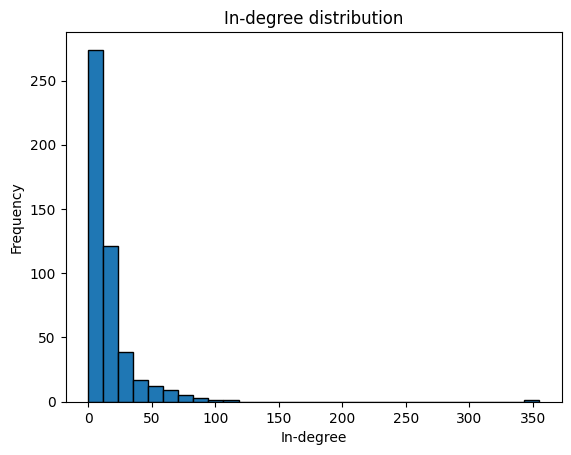

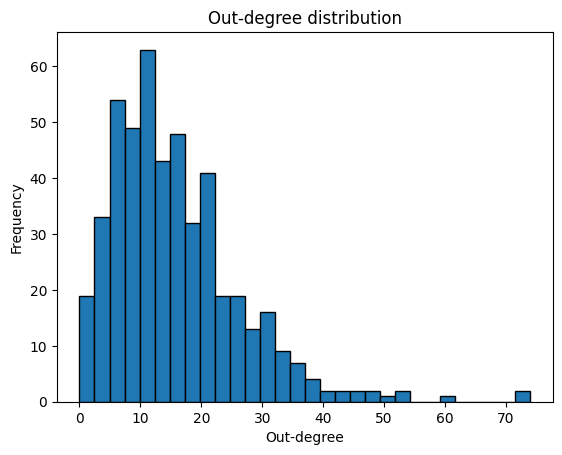

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Degrees
in_degs = [d for n, d in H.in_degree()]
out_degs = [d for n, d in H.out_degree()]

# --- Plot in-degree distribution ---
plt.hist(in_degs, bins=30, edgecolor='black')
plt.title("In-degree distribution")
plt.xlabel("In-degree")
plt.ylabel("Frequency")
plt.show()

# --- Plot out-degree distribution ---
plt.hist(out_degs, bins=30, edgecolor='black')
plt.title("Out-degree distribution")
plt.xlabel("Out-degree")
plt.ylabel("Frequency")
plt.show()


### ✅ 3. Comparison to reference networks

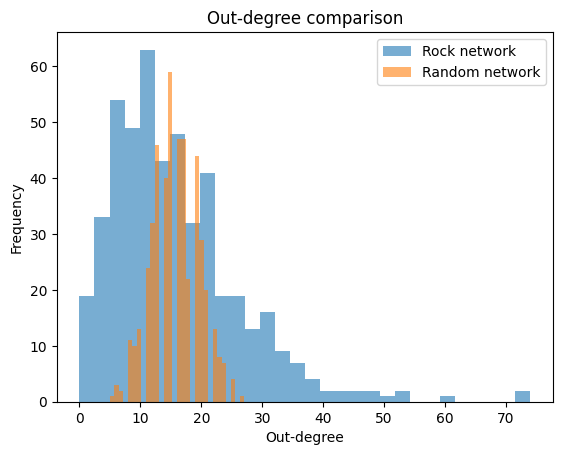

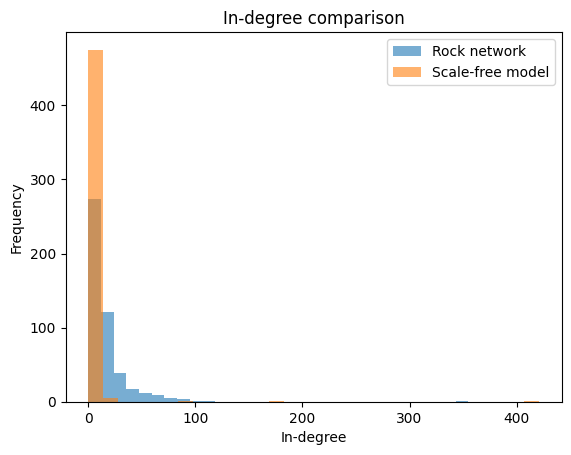

In [15]:
import networkx as nx

N = H.number_of_nodes()
M = H.number_of_edges()

# --- Random network with same N and M ---
G_rand = nx.gnm_random_graph(N, M, directed=True)
rand_out = [d for n, d in G_rand.out_degree()]

plt.hist(out_degs, bins=30, alpha=0.6, label="Rock network")
plt.hist(rand_out, bins=30, alpha=0.6, label="Random network")
plt.title("Out-degree comparison")
plt.xlabel("Out-degree")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# --- Scale-free (Barabási–Albert) for in-degree comparison ---
G_sf = nx.scale_free_graph(N)
sf_in = [d for n, d in G_sf.in_degree()]

plt.hist(in_degs, bins=30, alpha=0.6, label="Rock network")
plt.hist(sf_in, bins=30, alpha=0.6, label="Scale-free model")
plt.title("In-degree comparison")
plt.xlabel("In-degree")
plt.ylabel("Frequency")
plt.legend()
plt.show()


## Step-by-step process

1. **Collecting performer names**
   - I started from the Wikipedia page **“List of mainstream rock performers.”**
   - I copied the source markup of the page and used a regular expression to extract all internal wiki-links that correspond to performer names.
   - These titles (e.g., `Aerosmith`, `AC/DC`, `Avril_Lavigne`) became my list of nodes.

2. **Downloading wikitext for each performer**
   - Using the MediaWiki API, I requested the raw wikitext for each page.
   - I saved one file per performer into a local `pages/` folder, with filenames matching the wiki title (underscores instead of spaces, slashes replaced with underscores).
   - I added polite headers (`User-Agent`) and throttling to avoid **403** errors.

3. **Extracting links from performer pages**
   - For each downloaded file, I ran a regex that finds internal links of the form `[[Target]]` or `[[Target|Display]]`.
   - I cleaned the targets (remove fragments like `#Section`, skip non-article namespaces like `File:`).
   - I kept only links where the target matched one of the performers in my list.

4. **Building the directed graph**
   - I created a directed graph in **NetworkX**, adding one node per performer.
   - For each valid link from performer A’s page to performer B’s page, I added a directed edge `A → B`.
   - For each node, I also stored the content length (word count of its wikitext) as a node attribute.

5. **Cleaning the graph**
   - I removed isolated nodes (performers that neither linked to nor were linked from anyone).
   - I then extracted the largest weakly connected component, which forms the main rock-performer network used for analysis and visualization.

---

## The most difficult part

- The trickiest step was downloading the wikitext from Wikipedia reliably.
- At first, my requests failed with **403 Forbidden** errors, because the API blocks anonymous/bulk requests without a proper `User-Agent`.
- Handling redirects (e.g., `AC/DC → AC_DC`) and non-article namespaces also added complexity.
- Once I fixed the headers, reduced batch sizes, and added retries with backoff, the downloading worked consistently.

---

## What I would do differently next time

- Use the official Wikipedia dumps or bulk data sources instead of pulling page-by-page with the API. This would avoid rate-limiting and make the process much faster.
- Normalize performer names earlier (handling redirects, spaces, slashes) to prevent mismatches when linking nodes.
- Store the downloaded data in a lightweight database (like **SQLite**) instead of many text files, which would make queries and debugging easier.
- Modularize the code into reusable functions for each stage (download, parse, build graph), making the pipeline easier to rerun or adapt for other music genres.


## ✅ 4. Top 5 most connected performers

### Out-degree (who links to most others)
1. **Alice_in_Chains** — 74  
2. **Deep_Purple** — 72  
3. **Black_Sabbath** — 61  
4. **Def_Leppard** — 53  
5. **Guns_N'_Roses** — 52  

### In-degree (who is most referenced)
1. **AllMusic** — 355 ← not a performer, but a music database page that slipped in  
2. **Led_Zeppelin** — 118  
3. **Bob_Dylan** — 95  
4. **Queen_(band)** — 87  
5. **David_Bowie** — 84  

---

## 💬 Comments

- **Alice in Chains** and **Deep Purple** stand out for linking out a lot — perhaps because their Wikipedia pages contain many references to other bands (influences, collaborations, comparisons).  
- On the **in-degree** side, we see canonical legends (**Led Zeppelin, Bob Dylan, David Bowie**) who are referenced across many performers’ pages.  
- The odd one is **AllMusic**, which is not a performer — a reminder that filtering wiki-links perfectly is hard.  


### ✅ 5. Ten pages with the longest content

In [16]:
# Sort performers by content_length attribute
lengths = [(n, H.nodes[n].get("content_length", 0)) for n in H.nodes]
top10_longest = sorted(lengths, key=lambda x: x[1], reverse=True)[:10]
top10_longest


[("Guns_N'_Roses", 60933),
 ('Coldplay', 47197),
 ('Queen_(band)', 46471),
 ('Marilyn_Manson_(band)', 46154),
 ('The_Rolling_Stones', 44129),
 ('U2', 43155),
 ('Paul_McCartney', 42594),
 ('David_Bowie', 42583),
 ('Bob_Dylan', 42556),
 ('Elton_John', 41474)]

# Part 3: Visualizing the networks

*Exercise:* Let's build a simple visualization of the network
>1. For the sake of the visualisation, let's convert our network to *undirected graph* (tip: There is a NetworkX command to help you).
>   * *Note*: Keep the directed graph, we will use it in the following exercises.
>2. Use the NetworkX command `nx.spring_layout` or `nx.draw_kamada_kawai` to draw the resulting undirected network. (You can find [background on the algorithms here](https://en.wikipedia.org/wiki/Force-directed_graph_drawing).)  
>   * Set up your plot so that node-size depends on the node *degree*.
>   * Make the node color depend on the `length of content` attribute. I recommend choosing a color scheme that is quite simple (e.g. the Sequential ones here: https://matplotlib.org/stable/users/explain/colors/colormaps.html)


If you want to make things more fancy, note that Wikipedia writes that local minima is a problem for these graphs: "It is easy to see that force-directed algorithms produce a graph with minimal energy, in particular one whose total energy is only a local minimum. The local minimum found can be, in many cases, considerably worse than a global minimum, which translates into a low-quality drawing. For many algorithms, especially the ones that allow only down-hill moves of the vertices, the final result can be strongly influenced by the initial layout, that in most cases is randomly generated. The problem of poor local minima becomes more important as the number of vertices of the graph increases. **A combined application of different algorithms is helpful to solve this problem**. For example, using the Kamada–Kawai algorithm to quickly generate a reasonable initial layout and then the Fruchterman–Reingold algorithm to improve the placement of neighbouring nodes." (my emphasis) 

But don't worry if your network looks like a hairball (a.k.a a *ridiculogram*) for now, we'll dig deeper with visualization next time.

Undirected for viz: 483 nodes, 6296 edges
Computing layouts (KK init -> Spring refine)...


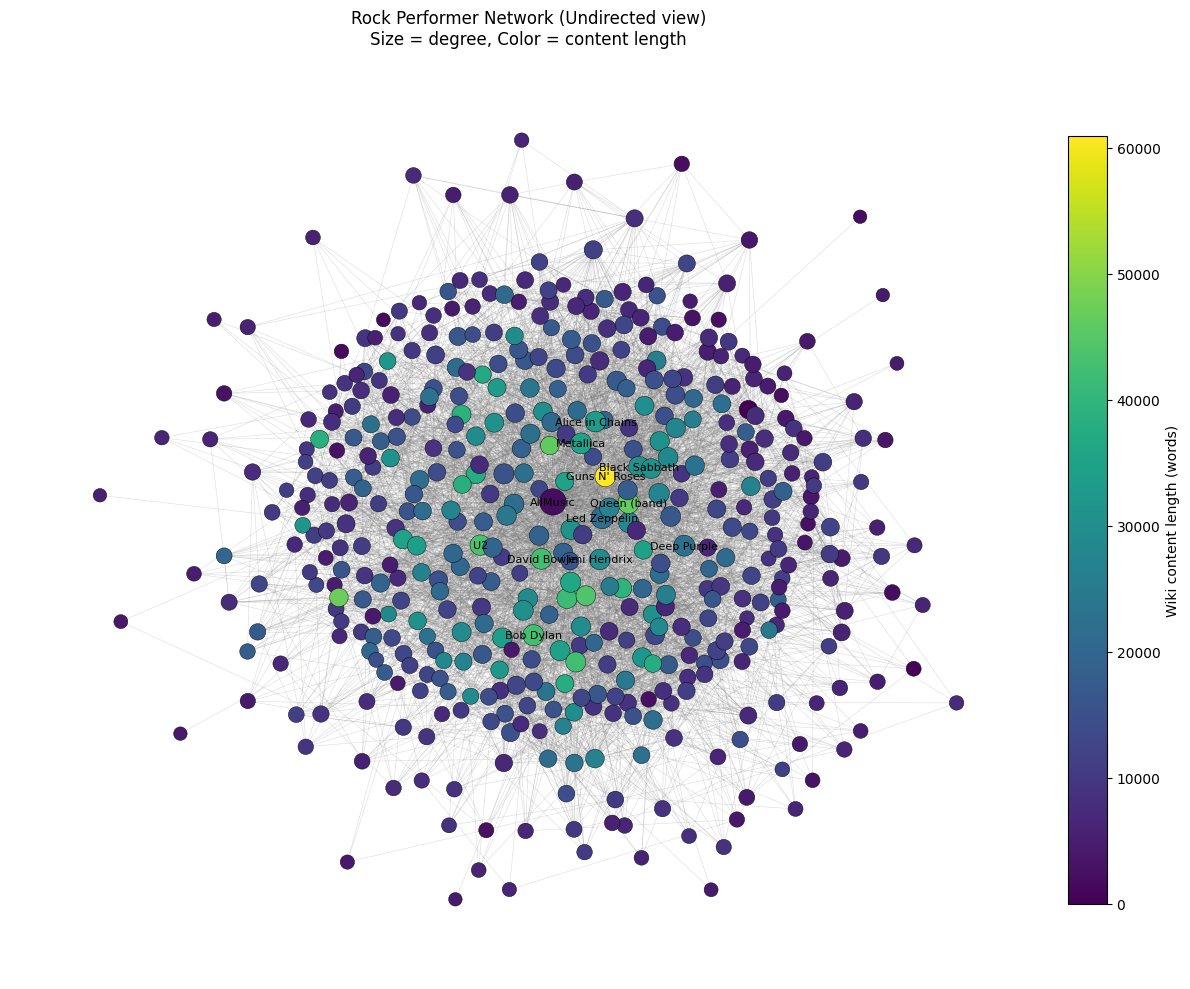

In [19]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# 1) Make an undirected view to visualize (keep H for later!)
G_und = H.to_undirected()

print(f"Undirected for viz: {G_und.number_of_nodes()} nodes, {G_und.number_of_edges()} edges")

# 2) Node metrics for viz
deg_dict = dict(G_und.degree())
degrees = np.array([deg_dict[n] for n in G_und.nodes()])

# Content length (fallback to 0 if missing)
content = np.array([H.nodes[n].get("content_length", 0) for n in G_und.nodes()])

# 3) Scale node sizes by degree (tweak multipliers to taste)
#    Use sqrt to compress very high degrees so sizes stay reasonable.
node_sizes = 80 + 15 * np.sqrt(degrees)

# 4) Map content length to color (Sequential colormap)
cmap = plt.cm.viridis  # simple sequential map
norm = Normalize(vmin=content.min(), vmax=content.max(), clip=True)
node_colors = cmap(norm(content))

# 5) Two-stage layout to reduce bad local minima:
#    Start with Kamada–Kawai, then refine with Spring using KK as init.
print("Computing layouts (KK init -> Spring refine)...")
pos= nx.kamada_kawai_layout(G_und, weight=None)   # ignore weights; positions only
#pos = nx.spring_layout(G_und, pos=pos, iterations=150, seed=42)

# 6) Draw
fig, ax = plt.subplots(figsize=(12, 10))
nx.draw_networkx_edges(G_und, pos, width=0.4, alpha=0.25, edge_color="#777777", ax=ax)
nx.draw_networkx_nodes(
    G_und, pos,
    node_size=node_sizes,
    node_color=node_colors,
    linewidths=0.3,
    edgecolors="black",
    ax=ax
)
# (Optional) label a handful of high-degree nodes to avoid clutter
label_nodes = set(sorted(deg_dict, key=deg_dict.get, reverse=True)[:12])
labels = {n: n.replace("_", " ") for n in G_und.nodes() if n in label_nodes}
nx.draw_networkx_labels(G_und, pos, labels=labels, font_size=8, ax=ax)

# 7) Colorbar for content length
sm = ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, fraction=0.035, pad=0.02)
cbar.set_label("Wiki content length (words)")

plt.title("Rock Performer Network (Undirected view)\nSize = degree, Color = content length", pad=12)
plt.axis("off")
plt.tight_layout()
plt.show()
